In [1]:
#Assignent4 
#  Merge CDS data with CRSP-Compustat data based on date gvkey and date.


In [2]:
#import package as usual 
import numpy as np
import pandas as pd 

In [3]:
#read cds first
data = pd.read_stata('cds_spread5y_2001_2016.dta',encoding='ascii')
data

,gvkey,mdate,redcode,tier,ticker,shortname,docclause,spread5y,impliedrating
0,001038,2004-08-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,MR,0.042000,BB
1,001038,2005-08-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,XR,0.034000,BB
2,001038,2005-09-30,0A17CF,SNRFOR,AEN,AMC Entmt Inc,XR,0.034000,BB
3,001038,2005-10-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,XR,0.034001,BB
4,001038,2005-11-30,0A17CF,SNRFOR,AEN,AMC Entmt Inc,XR,0.034001,BB
5,001038,2005-12-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,XR,0.034050,BB
6,001038,2006-01-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,XR,0.034051,BB
7,001038,2006-02-28,0A17CF,SNRFOR,AEN,AMC Entmt Inc,MR,0.057000,BB
8,001038,2006-03-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,MR,0.040357,BB
9,001038,2006-04-30,0A17CF,SNRFOR,AEN,AMC Entmt Inc,MR,0.044750,BB


In [4]:
#read compustat data
data2 = pd.read_csv('Quarterly Merged CRSP-Compustat.csv',encoding='ascii')

/Users/broteinlee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,33,37,654,655,656,657,661,675,676,686) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#convert date to quarter based 
#there are 3 type of quarter
#type I  : 1,4,7,10  
#type II : 2,5,8,11  
#type III: 3,6,9,12  
#For example, 2010/8 will convert into type II quarter 2,so we will use 2010q2 typeII
data2.rename(columns={'GVKEY': 'gvkey'},inplace = True)
data2['qtr'] = pd.PeriodIndex(pd.to_datetime(data2.datadate), freq='Q')

#convert time to type
data2['month'] = pd.DatetimeIndex(data2['datadate']).month
data2['CDSyear'] = pd.DatetimeIndex(data2['datadate']).year

conditions = [
    ((data2['month']%3) == 1) ,
    ((data2['month']%3) == 2),
    ((data2['month']%3) == 0)]
choices = ['I', 'II', 'III']
data2['type'] = np.select(conditions, choices)
data2
#print(data2.columns.tolist())
#print(data.columns.tolist())

,gvkey,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyearq,...,spcsrc,state,stko,weburl,dldte,ipodate,qtr,month,CDSyear,type
0,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,03/31/2001,2000,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2001Q1,3,2001,III
1,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,06/30/2001,2001,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2001Q2,6,2001,III
2,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,09/30/2001,2001,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2001Q3,9,2001,III
3,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,12/31/2001,2001,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2001Q4,12,2001,III
4,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,03/31/2002,2001,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2002Q1,3,2002,III
5,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,06/30/2002,2002,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2002Q2,6,2002,III
6,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,09/30/2002,2002,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2002Q3,9,2002,III
7,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,12/31/2002,2002,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2002Q4,12,2002,III
8,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,03/31/2003,2002,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2003Q1,3,2003,III
9,1038,P,1,LU,66413,6301,08/18/1983,12/31/2004,06/30/2003,2003,...,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2003Q2,6,2003,III


In [6]:
#merge CDS with compustat data
#get the fiscal year and roughly quater
data['qtr'] = pd.PeriodIndex(pd.to_datetime(data.mdate), freq='Q')
data3 = data2[['gvkey', 'qtr', 'type']]
data4 = data.merge(data3, left_on=['gvkey','qtr'], right_on=['gvkey','qtr'])
print(data4)   #empty ?

Empty DataFrame
Columns: [gvkey, mdate, redcode, tier, ticker, shortname, docclause, spread5y, impliedrating, qtr, type]
Index: []


In [7]:
#check type for debugging
print(data.gvkey.dtype)
print(data2.gvkey.dtype)

#we find the types are different that's why it cannot match 
#convert type object to type int64
data['gvkey'] = data['gvkey'].astype(str).astype(int)
print(data.gvkey.dtype)


object
int64
int64


In [8]:
data4 = data.merge(data3, left_on=['gvkey','qtr'], right_on=['gvkey','qtr'])
data4

,gvkey,mdate,redcode,tier,ticker,shortname,docclause,spread5y,impliedrating,qtr,type
0,1038,2004-08-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,MR,0.042000,BB,2004Q3,III
1,1045,2002-01-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.055625,CCC,2002Q1,III
2,1045,2002-02-28,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.056563,CCC,2002Q1,III
3,1045,2002-03-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.043750,CCC,2002Q1,III
4,1045,2002-04-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.041500,CCC,2002Q2,III
5,1045,2002-05-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.042500,CCC,2002Q2,III
6,1045,2002-06-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.047925,CCC,2002Q2,III
7,1045,2002-07-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.080200,CCC,2002Q3,III
8,1045,2002-08-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.107286,CCC,2002Q3,III
9,1045,2002-09-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.220847,CCC,2002Q3,III


In [9]:
#get the month to set the different condition 
data4['month'] = pd.DatetimeIndex(data4['mdate']).month
data4['year'] = pd.DatetimeIndex(data4['mdate']).year
#For type I, we can just use use normal way to get the qtr
#For typeII & typeIII, we have to transform it to correct month to get the qtr
#For example, in type II we should transfer Jan 2017 to 2016 Q4
conditions = [
    ((data4['type']) == 'I') ,
    ((data4['type']) == "II"),
    ((data4['type']) == "III")]
choices = [(data4['month'] ),
           (data4['month'] - 1),
           (data4['month'] - 2)]
data4['fiscal_month'] = np.select(conditions, choices)

In [10]:
#def get_qtr(df):
#    if df['fiscal_month'] < 0 :
#        df['year'] = df['year'] -1
#        df['fiscal_month2'] = df['fiscal_month']%12
#        df['STATUS_1'] = str(df['year'])+'-'+str(df['fiscal_month2'])
#        return df['STATUS_1']
#    else:
#        df['STATUS_2'] = str(df['year'])+'-'+str(df['fiscal_month'])
#        return df['STATUS_2']
#data4['fiscal_date'] = data4.apply(get_qtr, axis = 1)

#to get the correct year & month 
data4['fiscal_year']= np.where((data4['fiscal_month'])>0, data4['year'], data4['year']-1 )
data4['fiscal_month']= np.where((data4['fiscal_month'])>0, data4['fiscal_month'], data4['fiscal_month']+12)
#print(data4.fiscal_year.dtype)
#print(data4.fiscal_month.dtype)
#print(data4.month.dtype)

#convert it into correct qtr
data4["fiscal_date"] = data4['fiscal_year'].map(str) +'-'+ data4['fiscal_month'].map(str)
data4['fiscal_qtr'] = pd.PeriodIndex(pd.to_datetime(data4.fiscal_date), freq='Q')
data4

,gvkey,mdate,redcode,tier,ticker,shortname,docclause,spread5y,impliedrating,qtr,type,month,year,fiscal_month,fiscal_year,fiscal_date,fiscal_qtr
0,1038,2004-08-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,MR,0.042000,BB,2004Q3,III,8,2004,6,2004,2004-6,2004Q2
1,1045,2002-01-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.055625,CCC,2002Q1,III,1,2002,11,2001,2001-11,2001Q4
2,1045,2002-02-28,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.056563,CCC,2002Q1,III,2,2002,12,2001,2001-12,2001Q4
3,1045,2002-03-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.043750,CCC,2002Q1,III,3,2002,1,2002,2002-1,2002Q1
4,1045,2002-04-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.041500,CCC,2002Q2,III,4,2002,2,2002,2002-2,2002Q1
5,1045,2002-05-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.042500,CCC,2002Q2,III,5,2002,3,2002,2002-3,2002Q1
6,1045,2002-06-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.047925,CCC,2002Q2,III,6,2002,4,2002,2002-4,2002Q2
7,1045,2002-07-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.080200,CCC,2002Q3,III,7,2002,5,2002,2002-5,2002Q2
8,1045,2002-08-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.107286,CCC,2002Q3,III,8,2002,6,2002,2002-6,2002Q2
9,1045,2002-09-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.220847,CCC,2002Q3,III,9,2002,7,2002,2002-7,2002Q3


In [11]:
#make table neat
data5 = data4.drop(['month','qtr', 'year','fiscal_month', 'fiscal_year','fiscal_date'], axis=1)
data5

,gvkey,mdate,redcode,tier,ticker,shortname,docclause,spread5y,impliedrating,type,fiscal_qtr
0,1038,2004-08-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,MR,0.042000,BB,III,2004Q2
1,1045,2002-01-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.055625,CCC,III,2001Q4
2,1045,2002-02-28,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.056563,CCC,III,2001Q4
3,1045,2002-03-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.043750,CCC,III,2002Q1
4,1045,2002-04-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.041500,CCC,III,2002Q1
5,1045,2002-05-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.042500,CCC,III,2002Q1
6,1045,2002-06-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.047925,CCC,III,2002Q2
7,1045,2002-07-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.080200,CCC,III,2002Q2
8,1045,2002-08-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.107286,CCC,III,2002Q2
9,1045,2002-09-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.220847,CCC,III,2002Q3


In [12]:
#merge final CDS(data5) with compustat(data2)
final = data5.merge(data2, left_on=['gvkey','fiscal_qtr','type'], right_on=['gvkey','qtr','type'])
final

,gvkey,mdate,redcode,tier,ticker,shortname,docclause,spread5y,impliedrating,type,...,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate,qtr,month,CDSyear
0,1038,2004-08-31,0A17CF,SNRFOR,AEN,AMC Entmt Inc,MR,0.042000,BB,III,...,978.0,NaN,MO,0.0,www.amctheatres.com,12/27/2004,NaN,2004Q2,6,2004
1,1045,2002-01-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.055625,CCC,III,...,600.0,D,TX,0.0,www.aa.com,NaN,NaN,2001Q4,12,2001
2,1045,2002-02-28,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.056563,CCC,III,...,600.0,D,TX,0.0,www.aa.com,NaN,NaN,2001Q4,12,2001
3,1045,2002-03-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.043750,CCC,III,...,600.0,D,TX,0.0,www.aa.com,NaN,NaN,2002Q1,3,2002
4,1045,2002-04-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.041500,CCC,III,...,600.0,D,TX,0.0,www.aa.com,NaN,NaN,2002Q1,3,2002
5,1045,2002-05-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.042500,CCC,III,...,600.0,D,TX,0.0,www.aa.com,NaN,NaN,2002Q1,3,2002
6,1045,2002-06-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.047925,CCC,III,...,600.0,D,TX,0.0,www.aa.com,NaN,NaN,2002Q2,6,2002
7,1045,2002-07-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.080200,CCC,III,...,600.0,D,TX,0.0,www.aa.com,NaN,NaN,2002Q2,6,2002
8,1045,2002-08-31,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.107286,CCC,III,...,600.0,D,TX,0.0,www.aa.com,NaN,NaN,2002Q2,6,2002
9,1045,2002-09-30,0A18DB,SNRFOR,AMR,AMR Corp,MR,0.220847,CCC,III,...,600.0,D,TX,0.0,www.aa.com,NaN,NaN,2002Q3,9,2002


In [13]:
#Step for Assignment 5 
#1. Impute missing values with median.
#2. Keep only numerical variables.
#3. Remove variables that are all missing.
#4. Divide the dataset to test and train. Consider 2016, 2017, and 2018 data as test and the rest as train.
#5. On the train sample run a Random Forest with 50 trees (note that it may take a while)
#6. Keep the first 50 features with highest feature importance and discard the rest from both test and train.
#7. Using these 50 variables run Random Forest, Gradient Boosting, and XGBoost with 100, 200, 500, and 1000 trees.
#8. Show the relationship between number of trees and “Mean Squared Error” of test sample in a line graph. 
#   Show the results of all three techniques in a single graph.



In [14]:
#1. Impute missing values with median.
CDS_data = final.fillna(final.median())

In [15]:
#2. Keep only numerical variables.
CDS_data = CDS_data._get_numeric_data()

#3. Remove variables that are all missing.
CDS_data = CDS_data.dropna(axis='columns')

#4. Divide the dataset to test and train.
Train = CDS_data[CDS_data["CDSyear"]<2016]
Test = CDS_data[CDS_data["CDSyear"]>=2016]


In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 50 trees
rf = RandomForestRegressor(n_estimators = 50)

Y_Column = "spread5y"
#Split train_x and train_y
Y_Train = Train[Y_Column]
X_Train = Train.drop(Y_Column,axis=1)

Y_Test = Test[Y_Column]
X_Test = Test.drop(Y_Column,axis=1)

In [17]:
#5 Run Random Forest 
forest_fit = rf.fit(X_Train, Y_Train)

In [18]:
#get the result
y_pred = rf.predict(X_Test) 
print(y_pred)
print("The accuracy of the random forest is ", forest_fit.score(X_Test, Y_Test))


[0.040427  0.040427  0.040427  ... 0.0240794 0.0240794 0.0240794]
The accuracy of the random forest is  -0.2944890745694235


In [19]:
#6. Keep the first 50 features with highest feature importance

#list the importance of all features
importances = forest_fit.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = Train.columns[1:]
#for f in range(X_Train.shape[1]):
#show only 1~60th
for f in range(60):    
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) prclq                          0.257734
 2) LPERMNO                        0.083389
 3) LPERMCO                        0.041434
 4) mkvaltq                        0.027364
 5) cstkq                          0.024618
 6) oeps12                         0.022462
 7) pnceps12                       0.020074
 8) epsfi12                        0.016311
 9) oepf12                         0.015536
10) epspi12                        0.012283
11) oepsxq                         0.010173
12) recchy                         0.008515
13) pncd12                         0.008470
14) xintq                          0.008364
15) prccq                          0.008279
16) opepsy                         0.008193
17) aqepsy                         0.008136
18) fyr                            0.007169
19) wcapq                          0.006869
20) epsx12                         0.005441
21) lltq                           0.005328
22) ppentq                         0.005177
23) cshfd12                     

In [48]:
#get no.50 and set as a threshold
#threshold = importances[indices[49]]

#import new module
#from sklearn.feature_selection import SelectFromModel
#sfm = SelectFromModel(forest_fit, threshold=threshold)
#sfm.fit(X_Train, Y_Train)
# Run too long,so I give up to use this way ...
#X_important_train = sfm.transform(X_Train)

In [20]:
#New method for select the feature
def selectKImportance(model, X, k=50):
     return X.iloc[:,model.feature_importances_.argsort()[::-1][:k]]


#newX = X_Train.iloc[:,forest_fit.feature_importances_.argsort()[::-1][:50]]
newX_Train = selectKImportance(rf,X_Train,50)   
print(newX_Train.shape)

#compare to original X
print(X_Train.shape)
#It works! 

#Also choose important variables from the Test dataset
newX_Test = selectKImportance(rf,X_Test,50) 
print(newX_Test.shape)

(111641, 50)
(111641, 634)
(6087, 50)


In [21]:
#Using these 50 variables run Random Forest with 100, 200, 500, and 1000 trees.

rf_100 = RandomForestRegressor(n_estimators = 100)
rf_200 = RandomForestRegressor(n_estimators = 200)
rf_500 = RandomForestRegressor(n_estimators = 500)
rf_1000 = RandomForestRegressor(n_estimators = 1000)

forest_fit_100 = rf_100.fit(newX_Train, Y_Train)
forest_fit_200 = rf_200.fit(newX_Train, Y_Train)
forest_fit_500 = rf_500.fit(newX_Train, Y_Train)
forest_fit_1000 = rf_1000.fit(newX_Train, Y_Train)


In [22]:
#get the result
print("The accuracy of the random forest is ", forest_fit_100.score(newX_Test, Y_Test))
print("The accuracy of the random forest is ", forest_fit_200.score(newX_Test, Y_Test))
print("The accuracy of the random forest is ", forest_fit_500.score(newX_Test, Y_Test))
print("The accuracy of the random forest is ", forest_fit_1000.score(newX_Test, Y_Test))

y_pred_100 = rf_100.predict(newX_Test)
y_pred_200 = rf_200.predict(newX_Test)
y_pred_500 = rf_500.predict(newX_Test)
y_pred_1000 = rf_1000.predict(newX_Test)


The accuracy of the random forest is  -0.6142728404693598
The accuracy of the random forest is  -0.6270952496784754
The accuracy of the random forest is  -0.6984063915885088
The accuracy of the random forest is  -0.5717243460444759


In [23]:
#Using these 50 variables run Gradient Boosting with 100, 200, 500, and 1000 trees.
from sklearn.ensemble import GradientBoostingRegressor

GBR_100 = GradientBoostingRegressor(n_estimators = 100)
GBR_200 = GradientBoostingRegressor(n_estimators = 200)
GBR_500 = GradientBoostingRegressor(n_estimators = 500)
GBR_1000 = GradientBoostingRegressor(n_estimators = 1000)


GBR_fit_100 = GBR_100.fit(newX_Train, Y_Train)
GBR_fit_200 = GBR_200.fit(newX_Train, Y_Train)
GBR_fit_500 = GBR_500.fit(newX_Train, Y_Train)
GBR_fit_1000 = GBR_1000.fit(newX_Train, Y_Train)

In [24]:
y_pred_gb100 = GBR_100.predict(newX_Test)  
y_pred_gb200 = GBR_200.predict(newX_Test)
y_pred_gb500 = GBR_500.predict(newX_Test)  
y_pred_gb1000 = GBR_1000.predict(newX_Test)

In [25]:
#get the result
print("The accuracy of the Gradient Boosting is ", GBR_fit_100.score(newX_Test, Y_Test))
print("The accuracy of the Gradient Boosting is ", GBR_fit_200.score(newX_Test, Y_Test))
print("The accuracy of the Gradient Boosting is ", GBR_fit_500.score(newX_Test, Y_Test))
print("The accuracy of the Gradient Boosting is ", GBR_fit_1000.score(newX_Test, Y_Test))


The accuracy of the Gradient Boosting is  -0.18969100666519867
The accuracy of the Gradient Boosting is  -0.2375018785743146
The accuracy of the Gradient Boosting is  -0.3457412226597154
The accuracy of the Gradient Boosting is  -0.3401794348386069


In [28]:
#Using these 50 variables run XGBoost with 100, 200, 500, and 1000 trees.
#step for install xgboost in Mac
#git clone --recursive https://github.com/dmlc/xgboost.git
#cd xgboost
#./build.sh
#cd python-package
#python setup.py install
#-------------------in Anaconda-------------------
#conda install -c conda-forge xgboost 
import xgboost as xgb
xgb_reg_100 = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 100)
xgb_reg_200 = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 200)
xgb_reg_500 = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 500)
xgb_reg_1000 = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 1000)

xgb_fit_100 = xgb_reg_100.fit(newX_Train, Y_Train)
xgb_fit_200 = xgb_reg_200.fit(newX_Train, Y_Train)
xgb_fit_500 = xgb_reg_500.fit(newX_Train, Y_Train)
xgb_fit_1000 = xgb_reg_1000.fit(newX_Train, Y_Train)


In [29]:
y_pred_xgb100 = xgb_reg_100.predict(newX_Test)  
y_pred_xgb200 = xgb_reg_200.predict(newX_Test)
y_pred_xgb500 = xgb_reg_500.predict(newX_Test)  
y_pred_xgb1000 = xgb_reg_1000.predict(newX_Test)

In [30]:
#get the result
print("The accuracy of the XGBoost is ", xgb_fit_100.score(newX_Test, Y_Test))
print("The accuracy of the XGBoost is ", xgb_fit_200.score(newX_Test, Y_Test))
print("The accuracy of the XGBoost is ", xgb_fit_500.score(newX_Test, Y_Test))
print("The accuracy of the XGBoost is ", xgb_fit_1000.score(newX_Test, Y_Test))

The accuracy of the XGBoost is  -0.20881480886175607
The accuracy of the XGBoost is  -0.27517820414699456
The accuracy of the XGBoost is  -0.3711054907980187
The accuracy of the XGBoost is  -0.3576201417950806


In [31]:
#Show the relationship between number of trees and “Mean Squared Error” of test sample in a line graph. 
#Show the results of all three techniques in a single graph.
import matplotlib.pyplot as plt
from sklearn import metrics

print('Mean Squared Error(100):', metrics.mean_squared_error(Y_Test, y_pred_100))
print('Mean Squared Error(200):', metrics.mean_squared_error(Y_Test, y_pred_200))
print('Mean Squared Error(500):', metrics.mean_squared_error(Y_Test, y_pred_500))
print('Mean Squared Error(1000):', metrics.mean_squared_error(Y_Test, y_pred_1000))

#the mse for random forest 
tree_num = [100,200,500,1000]
err_rf_100 = metrics.mean_squared_error(Y_Test, y_pred_100)
err_rf_200 = metrics.mean_squared_error(Y_Test, y_pred_200)
err_rf_500 = metrics.mean_squared_error(Y_Test, y_pred_500)
err_rf_1000 = metrics.mean_squared_error(Y_Test, y_pred_1000)

forest_mse = []
forest_mse.append(err_rf_100)
forest_mse.append(err_rf_200)
forest_mse.append(err_rf_500)
forest_mse.append(err_rf_1000)



Mean Squared Error(100): 0.0012173098212508024
Mean Squared Error(200): 0.0012269790941711193
Mean Squared Error(500): 0.0012807542375269682
Mean Squared Error(1000): 0.0011852243528935535


In [38]:
#the mse for Gradient Boost
gb_mse = []
err_gb_100 = metrics.mean_squared_error(Y_Test, y_pred_gb100)
err_gb_200 = metrics.mean_squared_error(Y_Test, y_pred_gb200)
err_gb_500 = metrics.mean_squared_error(Y_Test, y_pred_gb500)
err_gb_1000 = metrics.mean_squared_error(Y_Test, y_pred_gb1000)

#print(err_gb_100)



gb_mse.append(err_gb_100)
gb_mse.append(err_gb_200)
gb_mse.append(err_gb_500)
gb_mse.append(err_gb_1000)

In [39]:
#the mse for XGBoost
xgb_mse = []
err_xgb_100 = metrics.mean_squared_error(Y_Test, y_pred_xgb100)
err_xgb_200 = metrics.mean_squared_error(Y_Test, y_pred_xgb200)
err_xgb_500 = metrics.mean_squared_error(Y_Test, y_pred_xgb500)
err_xgb_1000 = metrics.mean_squared_error(Y_Test, y_pred_xgb1000)
#print(err_xgb_100)

xgb_mse.append(err_xgb_100)
xgb_mse.append(err_xgb_200)
xgb_mse.append(err_xgb_500)
xgb_mse.append(err_xgb_1000)

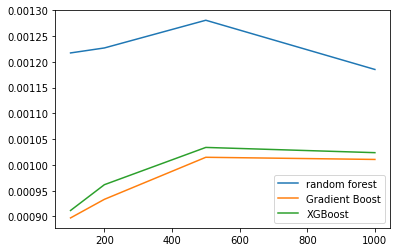

In [41]:
plt.plot(tree_num ,forest_mse, label='random forest')
plt.plot(tree_num ,gb_mse, label='Gradient Boost')
plt.plot(tree_num ,xgb_mse, label='XGBoost')
plt.legend(loc='lower right')
plt.show()